In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import operator
import random
import seaborn as sns
plt.style.use('seaborn')

In [37]:
iris=datasets.load_iris()



In [38]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
def knn(x_test,x_data,y_data,k):
    x_data_size=x_data.shape[0]
    np.tile(x_test,(x_data_size,1))
    diff=np.tile(x_test,(x_data_size,1))-x_data
    sqDiff=diff**2
    sqDistances=sqDiff.sum(axis=1)
    distance=sqDistances**0.5
    sortedDistance=distance.argsort()
    classCount={}
    for i in range(k):
        votelabel=y_data[sortedDistance[i]]
        classCount[votelabel]=classCount.get(votelabel,0)+1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
    

In [40]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target)

In [41]:
predictions=[]
for i in range(x_test.shape[0]):
    predictions.append(knn(x_test[i],x_train,y_train,5))

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.93      0.93      0.93        15
          2       0.93      0.93      0.93        14

avg / total       0.95      0.95      0.95        38



In [43]:
print(confusion_matrix(y_test,predictions))

[[ 9  0  0]
 [ 0 14  1]
 [ 0  1 13]]


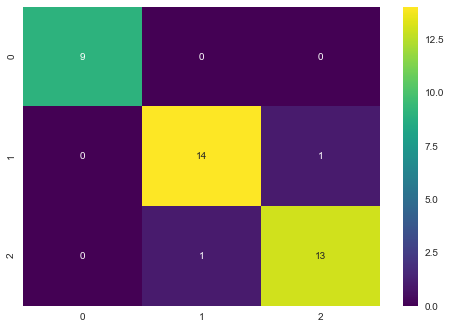

In [46]:
con=confusion_matrix(y_test,predictions)
sns.heatmap(con,annot=True,cmap='viridis')